# LeR complete examples

* Please refer to the [documentation](https://ler.readthedocs.io/en/latest/) for more details.

## TOC:
  
* [Using custom functions and parameters](##bullet-two)
  * [Defining custom functions and parameters](###bullet-two-one)
  * [LeR initialization with custom functions and parameters](###bullet-two-two)
  * [Sampling (Unlensed)](###bullet-two-three)
  * [Sampling (Lensed)](###bullet-two-four)
  * [Rate calculation and comparison](###bullet-two-five)

* [Uning available model functions](##bullet-three)
  * [Comparison of mass distribution model](###bullet-three-one)
  * [Comparison of Axis-ratio model of the lensing galaxy](###bullet-three-two)

## Using custom functions and parameters. <a class="anchor" id="bullet-two"></a>


* `ler` allows internal model functions to be change with custom functions.

* It also allows to change the default parameters of the existing model functions.

First let's look at what are the input parameters available for `LeR` class. The input paramters can divided into five categories

1. ler.LeR set up params

2. ler.CBCSourceParameterDistribution set up params (as kwargs)

3. ler.LensGalaxyParameterDistribution set up params (as kwargs)

4. ler.ImageProperties set up params (as kwargs)

5. gwsnr.GWSNR set up params (as kwargs)

Complete LeR initialization is shown below,

In [ ]:
# # # below is the example of LeR initialization with all the arguments.
# from ler.rates import LeR
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.cosmology import LambdaCDM

# # Uncomment the below code if you need to change the default arguments.
# ler = LeR(
#     # LeR setup arguments
#     npool=4, # number of processors to use
#     z_min=0.0, # minimum redshift
#     z_max=10.0, # maximum redshift
#     event_type='BBH', # event type
#     lens_type = 'epl_shear_galaxy', # lens type
#     cosmology=LambdaCDM(H0=70, Om0=0.3, Ode0=0.7), # cosmology
#     pdet_finder=None,  # if None, the pdet_finder will be calculated using the gwsnr package. 
#     list_of_detectors=None, # list of detectors that will be considered when calculating snr or pdet for lensed events. if None, all the detectors from 'gwsnr' will be considered
#     json_file_names=dict(
#         ler_params="ler_params.json", # to store initialization parameters and important results
#         unlensed_param="unlensed_param.json", # to store all unlensed events
#         unlensed_param_detectable="unlensed_param_detectable.json", # to store only detectable unlensed events
#         lensed_param="lensed_param.json", # to store all lensed events 
#         lensed_param_detectable="lensed_param_detectable.json"), # to store only detectable lensed events
#     interpolator_directory='./interpolator_json', # directory to store the interpolator pickle files. 'ler' uses interpolation to get values of various functions to speed up the calculations (relying on numba njit).
#     ler_directory='./ler_data', # directory to store all the outputs
#     verbose=True, # if True, will print all information at initialization

#     # CBCSourceParameterDistribution class arguments
#     source_priors = dict(
#         merger_rate_density = 'merger_rate_density_bbh_popI_II_oguri2018',
#         zs = 'source_redshift',
#         source_frame_masses = 'binary_masses_BBH_popI_II_powerlaw_gaussian',
#         geocent_time = 'sampler_uniform',
#         ra = 'sampler_uniform',
#         dec = 'sampler_cosine',
#         phase = 'sampler_uniform',
#         psi = 'sampler_uniform',
#         theta_jn = 'sampler_sine',
#         a_1 = 'sampler_uniform',
#         a_2 = 'sampler_uniform',
#     ),
#     source_priors_params= dict(
#         merger_rate_density = {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30},
#         zs = None,
#         source_frame_masses = {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81},
#         geocent_time = {'xmin': 1238166018, 'xmax': 1269702018},
#         ra = {'xmin': 0.0, 'xmax': 6.283185307179586},
#         dec = None,
#         phase = {'xmin': 0.0, 'xmax': 6.283185307179586},
#         psi = {'xmin': 0.0, 'xmax': 3.141592653589793},
#         theta_jn = None,
#         a_1 = {'xmin': -0.8, 'xmax': 0.8},
#         a_2 = {'xmin': -0.8, 'xmax': 0.8},
#     ),
#     spin_zero= True, # if True, spins will be set to zero
#     spin_precession= False, # if True, spins will be precessing

#     # LensGalaxyParameterDistribution class arguments
#     lens_functions = dict(
#         param_sampler_type = 'sample_all_routine_epl_shear_sl',
#         cross_section_based_sampler = 'importance_sampling_with_cross_section',
#         optical_depth = 'optical_depth_numerical',
#         cross_section = 'cross_section_epl_shear_interpolation',
#     ),
#     lens_functions_params = dict(
#         param_sampler_type = None,
#         cross_section_based_sampler = {'n_prop': 200},
#         optical_depth = None,
#         cross_section = None,
#     ),
#     lens_param_samplers = dict(
#         source_redshift_sl = 'strongly_lensed_source_redshifts',
#         lens_redshift = 'lens_redshift_strongly_lensed_numerical',
#         velocity_dispersion = 'velocity_dispersion_ewoud',
#         axis_ratio = 'axis_ratio_rayleigh',
#         axis_rotation_angle = 'axis_rotation_angle_uniform',
#         external_shear = 'external_shear_normal',
#         density_profile_slope = 'density_profile_slope_normal',
#         external_shear_sl = 'external_shear_normal',
#         density_profile_slope_sl = 'density_profile_slope_normal',
#     ),
#     lens_param_samplers_params = dict(
#         source_redshift_sl = None,
#         lens_redshift = {'integration_size': 20000},
#         velocity_dispersion = {'sigma_min': 100.0, 'sigma_max': 400.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': np.float64(0.02099), 'sigmastar': 113.78},
#         axis_ratio = {'q_min': 0.2, 'q_max': 1.0},
#         axis_rotation_angle = {'phi_min': 0.0, 'phi_max': 6.283185307179586},
#         external_shear = {'mean': 0.0, 'std': 0.05},
#         density_profile_slope = {'mean': 1.99, 'std': 0.149},
#         external_shear_sl = {'mean': 0.0, 'std': 0.05},
#         density_profile_slope_sl = {'mean': 2.078, 'std': 0.16},
#     ),

#     # ImageProperties class arguments
#     n_min_images = 2,
#     n_max_images = 4,
#     time_window = 630720000,
#     lens_model_list = ['EPL_NUMBA', 'SHEAR'],

#     # gwsnr package arguments
#     snr_method = 'interpolation_aligned_spins',
#     snr_type = 'optimal_snr',
#     gwsnr_verbose = True,
#     multiprocessing_verbose = True,
#     pdet_kwargs = dict(
#         snr_th = 10.0,
#         snr_th_net = 10.0,
#         pdet_type = 'boolean',
#         distribution_type = 'noncentral_chi2',
#         include_optimal_snr = False,
#         include_observed_snr = False,
#     ),
#     mtot_min = 9.96,
#     mtot_max = 500.0,
#     ratio_min = 0.1,
#     ratio_max = 1.0,
#     spin_max = 0.99,
#     mtot_resolution = 200,
#     ratio_resolution = 20,
#     spin_resolution = 10,
#     batch_size_interpolation = 1000000,
#     interpolator_dir = './interpolator_json',
#     sampling_frequency = 2048.0,
#     waveform_approximant = 'IMRPhenomD',
#     frequency_domain_source_model = 'lal_binary_black_hole',
#     minimum_frequency = 20.0,
#     reference_frequency = None,
#     duration_max = None,
#     duration_min = None,
#     fixed_duration = None,
#     mtot_cut = False,
#     psds = None,  # will consider the default bilby psds of 'L1', 'H1', 'V1'
#     ifos = None,  # will consider the default bilby interferometer objects of 'L1', 'H1', 'V1'

#     # common arguments, to generate interpolator
#     create_new_interpolator = dict(
#         merger_rate_density = {'create_new': False, 'resolution': 500},
#         redshift_distribution = {'create_new': False, 'resolution': 500},
#         luminosity_distance = {'create_new': False, 'resolution': 500},
#         differential_comoving_volume = {'create_new': False, 'resolution': 500},
#         source_frame_masses = {'create_new': False, 'resolution': 500},
#         geocent_time = {'create_new': False, 'resolution': 500},
#         ra = {'create_new': False, 'resolution': 500},
#         dec = {'create_new': False, 'resolution': 500},
#         phase = {'create_new': False, 'resolution': 500},
#         psi = {'create_new': False, 'resolution': 500},
#         theta_jn = {'create_new': False, 'resolution': 500},
#         a_1 = {'create_new': False, 'resolution': 500},
#         a_2 = {'create_new': False, 'resolution': 500},
#         tilt_1 = {'create_new': False, 'resolution': 500},
#         tilt_2 = {'create_new': False, 'resolution': 500},
#         phi_12 = {'create_new': False, 'resolution': 500},
#         phi_jl = {'create_new': False, 'resolution': 500},
#         velocity_dispersion = {'create_new': False, 'resolution': 500, 'zl_resolution': 48},
#         axis_ratio = {'create_new': False, 'resolution': 500, 'sigma_resolution': 48},
#         lens_redshift = {'create_new': False, 'resolution': 48, 'zl_resolution': 48},
#         lens_redshift_intrinsic = {'create_new': False, 'resolution': 500},
#         optical_depth = {'create_new': False, 'resolution': 48},
#         comoving_distance = {'create_new': False, 'resolution': 500},
#         angular_diameter_distance = {'create_new': False, 'resolution': 500},
#         angular_diameter_distance_z1z2 = {'create_new': False, 'resolution': 500},
#         density_profile_slope = {'create_new': False, 'resolution': 100},
#         lens_parameters_kde_sl = {'create_new': False, 'resolution': 5000},
#         cross_section = {'create_new': False, 'resolution': [25, 25, 45, 15, 15]},
#         gwsnr = False,
#     )
# )

### Defining custom functions and parameters.

In `ler`, you can chnage all the sampling functions and parameters. You can also change the detection criteria through the pdet finder.

As an example, I will change,

  * event type
    - 'BNS'
    - non-spinning

  * merger rate density
    - internally defined function
    - custom parameters

  * source frame masses
    - custom function

  * lens model
    - 'sie_galaxy'
    - fixed density profile and external shear

  * lens related functions and parameters
    - internally defined functions (axcept velocity dispersion and axis ratio)
    - custom parameters
  
  * pdet finder
    - custom function
    - Note: we will also change the pdet threshold according to the custom pdet finder.

**Note:** All custom functions (samplers only) should have 'size' as the only input.

#### Event Type

In [1]:
event_type = 'BNS'

# # this event_type will initialize the default GW parameter samplers corresponding to BNS
# merger_rate_density_prior = "merger_rate_density_bbh_popI_II_oguri2018"
# merger_rate_density_prior_params = dict(
#     R0=105.5 * 1e-9, b2=1.6, b3=2.1, b4=30
# )
# source_frame_masses_prior = "binary_masses_BNS_bimodal"
# source_frame_masses_prior_params = dict(
#     w=0.643,
#     muL=1.352,
#     sigmaL=0.08,
#     muR=1.88,
#     sigmaR=0.3,
#     mmin=1.0,
#     mmax=2.3,
# )
# a_max = 0.05

#### Merger Rate Density

In [2]:
merger_rate_density_function = 'merger_rate_density_bbh_popI_II_oguri2018'
merger_rate_density_input_args = dict(
            R0=105.5 * 1e-9, b2=1.6, b3=2.1, b4=30
        )

#### Source Frame Masses

In [3]:
# define the arguments for the bns bimodal pdf
source_frame_masses_args = dict(
    mmin=1.0, # minimum mass of the black hole (Msun)
    mmax=2.3, # maximum mass of the black hole (Msun)
)

# define your custom function of mass_1_source and mass_2_source calculation
# it should have 'size' as the only argument
def source_frame_masses_uniform(size):
    """
    Function to sample mass1 and mass2 from a powerlaw with a gaussian peak

    Parameters
    ----------
    size : `int`
        Number of samples to draw

    Returns
    -------
    mass_1_source : `numpy.ndarray`
        Array of mass1 samples
    mass_2_source : `numpy.ndarray`
        Array of mass2 samples
    """

    mass_1_source = np.random.uniform(source_frame_masses_args['mmin'], source_frame_masses_args['mmax'], size)
    mass_2_source = np.random.uniform(source_frame_masses_args['mmin'], source_frame_masses_args['mmax'], size)
    # swap if mass_2_source > mass_1_source
    idx = mass_2_source > mass_1_source
    mass_1_source[idx], mass_2_source[idx] = mass_2_source[idx], mass_1_source[idx] 

    return (mass_1_source, mass_2_source)

# # test
# mass_1_source, mass_2_source = source_frame_masses_uniform(size=10)
# print(mass_1_source)
# print(mass_2_source)

#### Lens model

In [4]:
lens_model = 'sie_galaxy'

# # this lens model will initialize the default lens functions and samplers corresponding to the lens model
# lens_param_samplers = dict(
#     source_redshift_sl="strongly_lensed_source_redshifts",
#     lens_redshift="lens_redshift_strongly_lensed_numerical",
#     velocity_dispersion="velocity_dispersion_ewoud",
#     axis_ratio="axis_ratio_rayleigh",
#     axis_rotation_angle="axis_rotation_angle_uniform",
#     external_shear="external_shear_normal",
#     density_profile_slope="density_profile_slope_normal",
#     external_shear_sl="external_shear_normal",
#     density_profile_slope_sl="density_profile_slope_normal",
# )
# lens_param_samplers_params = dict(
#     source_redshift_sl=None,
#     lens_redshift=dict(integration_size=20000),
#     velocity_dispersion=dict(
#         sigma_min=100.0,
#         sigma_max=400.0,
#         alpha=0.94,
#         beta=1.85,
#         phistar=2.099e-2 * (self.cosmo.h / 0.7) ** 3,
#         sigmastar=113.78,
#     ),
#     axis_ratio=dict(q_min=0.2, q_max=1.0),
#     axis_rotation_angle=dict(phi_min=0.0, phi_max=2 * np.pi),
#     external_shear=dict(mean=0.0, std=0.0),
#     density_profile_slope=dict(mean=2.0, std=0.0),
#     external_shear_sl=dict(mean=0.0, std=0.0),
#     density_profile_slope_sl=dict(mean=2.0, std=0.0),
# )
# lens_functions = dict(
#     param_sampler_type="sample_all_routine_epl_shear_sl",
#     cross_section_based_sampler="importance_sampling_with_cross_section",
#     optical_depth="optical_depth_numerical",
#     cross_section="cross_section_sie_feixu",
# )
# lens_functions_params = dict(
#     param_sampler_type=None,
#     cross_section_based_sampler=dict(n_prop=200),
#     optical_depth=dict(interpolated_cross_section=True),
#     cross_section=None,
# )

#### Velocity Dispersion and Axis Ratio

* it is recomended the lens functions are class objects of `ler.utils`'s FunctionConditioning

* refer to `FunctionConditioning` example for more details

In [5]:
import numpy as np

#--------------------------
# Velocity Dispersion
#--------------------------
from ler.utils import FunctionConditioning, redshift_optimal_spacing
# import number density function wrt velocity dispersion and redshift
from ler.lens_galaxy_population import phi

velocity_dispersion_args = dict(
    sigma_min=10,  # default ler sigma_min=100 km/s
    sigma_max=600,  # default ler sigma_max=400 km/s
    alpha=0.94,
    beta=1.85,
    phistar=2.099e-2,
    sigmastar=113.78,
)

# identifier_dict dict allows for easy tracking of the generated interpolator in future usage
identifier_dict = {"name": "velocity_dispersion_custom"}
identifier_dict["sigma_min"] = velocity_dispersion_args["sigma_min"]
identifier_dict["sigma_max"] = velocity_dispersion_args["sigma_max"]
identifier_dict["resolution"] = 500
identifier_dict["zl_resolution"] = 48

# setting up inputs for the interpolator
# Note: sigma_array and zl_array will form a 2D grid where the function is evaluated. Gird points are use for cubic spline interpolation.
sigma_array = np.linspace(
    identifier_dict["sigma_min"],
    identifier_dict["sigma_max"],
    identifier_dict["resolution"],
)
z_min = 0.001
z_max = 10.0
z_resolution = identifier_dict["zl_resolution"]
zl_array = redshift_optimal_spacing(z_min, z_max, z_resolution)

# define the function
number_density_function = lambda sigma, zl: phi(  # noqa: E731
    sigma,
    zl,
    alpha=velocity_dispersion_args["alpha"],
    beta=velocity_dispersion_args["beta"],
    phistar=velocity_dispersion_args["phistar"],
    sigmastar=velocity_dispersion_args["sigmastar"],
)

sigma_object = FunctionConditioning(
    function=number_density_function,
    x_array=sigma_array,
    conditioned_y_array=zl_array,
    identifier_dict=identifier_dict,
    directory="./interpolator_json",
    sub_directory="velocity_dispersion",
    name=identifier_dict["name"],
    create_new=False,
    create_function_inverse=False,
    create_function=True,
    create_pdf=True,
    create_rvs=True,
    callback="rvs",
)

#--------------------------
# Axis Ratio
#--------------------------
from scipy.interpolate import CubicSpline  # noqa: E402

axis_ratio_args = dict(
    q_min=0.2,
    q_max=1.0,
)

identifier_dict = {"name": "axis_ratio_padilla_strauss_custom"}
identifier_dict["q_min"] = axis_ratio_args["q_min"]
identifier_dict["q_max"] = axis_ratio_args["q_max"]
identifier_dict["resolution"] = 500

# Using Padilla and Strauss 2008 distribution for axis ratio
q_array = np.array(
    [0.04903276402927845,0.09210526315789469,0.13596491228070173,0.20789473684210524,0.2899703729522482,0.3230132450331126,0.35350877192982455,0.37946148483792264,0.4219298245614036,0.4689525967235971,0.5075026141512723,0.5226472638550018,0.5640350877192983,0.6096491228070177,0.6500000000000001,0.6864848379226213,0.7377192982456142,0.7787295224817011,0.8007581038689441,0.822786685256187,0.8668438480306729,0.8973684210526317,0.9254385964912283,
    ]
)
pdf = np.array(
    [0.04185262687135349,0.06114520695141845,0.096997499638376,0.1932510900336828,0.39547914337673706,0.49569751276216234,0.6154609137685201,0.7182049959882812,0.920153741243567,1.1573982157399754,1.3353263628106684,1.413149656448315,1.5790713532948977,1.7280185150744938,1.8132994441344819,1.8365803753840484,1.8178662203211204,1.748929843583365,1.688182592496342,1.6274353414093188,1.4948487090314488,1.402785526832393,1.321844068356993,
    ]
)

# Interpolate the pdf
spline = CubicSpline(q_array, pdf, extrapolate=True)
q_array = np.linspace(identifier_dict["q_min"], identifier_dict["q_max"], identifier_dict["resolution"])
pdf = spline(q_array)

q_object = FunctionConditioning(
    function=pdf,  # it also allows precomputed values, besides function
    x_array=q_array,
    conditioned_y_array=None,
    identifier_dict=identifier_dict,
    directory="./interpolator_json",
    sub_directory="axis_ratio",
    name="axis_ratio_padilla_strauss",
    create_new=False,
    create_function_inverse=False,
    create_function=True,
    create_pdf=True,
    create_rvs=True,
    callback="rvs",
)

velocity_dispersion_custom interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_custom_1.json
axis_ratio_padilla_strauss interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_padilla_strauss_2.json


In [11]:
q_object(10)

array([0.72569065, 0.5632402 , 0.70630569, 0.52779677,
       0.34686262, 0.5664222 , 0.55757269, 0.6924289 ,
       0.85723762, 0.90150156])

#### Pdet Finder

In [12]:
from ler.utils import is_njitted
from numba import njit

if q_object.conditioned_y_array is None:
    if is_njitted(q_object.rvs):
        print("q_object is njitted.")
        q_rvs = njit(lambda size, sigma: q_object(size))
    else:
        print("q_object is not njitted.")
        q_rvs = lambda size, sigma: q_object(size)  # noqa: E731
else:
    q_rvs = q_object

is_njitted(q_rvs)

q_object is njitted.


True

In [6]:
# Define a function that sets detection criteria
from gwsnr import GWSNR

mmin = 1.
mmax = 2.3
zmin = 0.
zmax = 10.

# for BNS, no spin system
gwsnr = GWSNR(
    npool = 4,
    snr_method = 'interpolation_no_spins',
    mtot_min = 2*mmin*(1+zmin), # minimum total mass (detector frame)
    mtot_max = 2*mmax*(1+zmax), # maximum total mass (detector frame)
    sampling_frequency = 2048.0,
    waveform_approximant = 'IMRPhenomD',
    minimum_frequency = 20.0,
    gwsnr_verbose = False,
)

# ler uses gwsnr.pdet and set detection threshold to 0.5
# Any pdet function should should take in a dictionary of gw parameters and return a dictionary with pdet_net as the key
# the following function allows optimal SNR value also to be returned 
def detection_criteria(gw_param_dict, detection_threshold=10):
    dict_ = {}
    dict_.update(gwsnr.optimal_snr(gw_param_dict=gw_param_dict))
    dict_['pdet_net'] = dict_['optimal_snr_net'] > detection_threshold
    return dict_

# # test
# gw_param_dict = dict(
#     mass_1 = np.array([20.0, 20.0]),
#     mass_2 = np.array([10.0, 10.0]),
#     luminosity_distance = np.array([1000.0, 2000.0]),
# )


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_json/L1/partialSNR_dict_2.json
Interpolator will be loaded for H1 detector from ./interpolator_json/H1/partialSNR_dict_2.json
Interpolator will be loaded for V1 detector from ./interpolator_json/V1/partialSNR_dict_2.json




### LeR initialization with custom functions and parameters <a class="anchor" id="bullet-two-two"></a>

* Initialize the class with the custom function

* changing ler input params

In [7]:
from ler.rates import LeR
import numpy as np

ler = LeR(
    # LeR setup arguments
    npool=6,
    z_min=0.001,
    z_max=5,
    verbose=True,
    event_type="BNS",
    lens_type="sie_galaxy",
    
    # CBCSourceParameterDistribution class arguments
    source_priors=dict(
        merger_rate_density=merger_rate_density_function,
        source_frame_masses=source_frame_masses_uniform,
    ),
    source_priors_params=dict(
        merger_rate_density_input_args = merger_rate_density_input_args,
        source_frame_masses=source_frame_masses_args,
    ),
    
    # LensGalaxyParameterDistribution class arguments
    lens_param_samplers=dict(
        velocity_dispersion=sigma_object,
        axis_ratio=q_object,
    ),
    lens_param_samplers_params=dict(
        velocity_dispersion=velocity_dispersion_args,
        axis_ratio=axis_ratio_args,
    ),

    # pdet finder
    pdet_finder=detection_criteria,
)


Initializing LeR class...


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

comoving_distance interpolator will be loaded from ./interpolator_json/comoving_distance/comoving_distance_1.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_1.json
using user provided custom velocity_dispersion class/object
using user provided custom axis_ratio function
using ler available axis_rotation_angle function : axis_rotation_angle_uniform
using ler available density_profile_slope function : density_profile_slope_normal
using ler available external_shear function : external_shear_normal
using ler

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /Users/phurailatpamhemantakumar/phd/mypackages/ler/ler/lens_galaxy_population/mp.py (12)

File "../../ler/lens_galaxy_population/mp.py", line 12:

@njit(parallel=True)
^

During: Pass nopython_type_inference 

This error may have been caused by the following argument(s):
- argument 4: Cannot determine Numba type of <class 'function'>


* since I am using inner product to calculate snr, it will take longer time to simulate the events.

* You can increase the speed by allocating more CPU cores to the code. For example, if you have 8 logical cores, set npool>4

### Sampling (Unlensed). <a class="anchor" id="bullet-two-three"></a>

In [8]:
unlensed_params = ler.unlensed_cbc_statistics(size=100000, batch_size=50000, resume=True, output_jsonfile = 'new_unlensed_params.json');

unlensed params will be stored in ./ler_data/new_unlensed_params.json
resuming from ./ler_data/new_unlensed_params.json
unlensed parameters already sampled.


In [9]:
ler.unlensed_rate();

Getting unlensed_param from json file ./ler_data/new_unlensed_params.json...
total unlensed rate (yr^-1): 10.18883169215997
number of simulated unlensed detectable events: 3
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json


### Sampling (Lensed). <a class="anchor" id="bullet-two-four"></a>

In [11]:
# increase the size if you need accurate rate calculation
lensed_params = ler.lensed_cbc_statistics(size=100000, batch_size=50000, resume=True, output_jsonfile = 'new_lensed_params.json');

lensed params will be store in ./ler_data/new_lensed_params.json
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4638.09it/s]


calculating pdet...
Batch no. 2
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4699.04it/s]


calculating pdet...


In [12]:
ler.lensed_rate();

Getting lensed_param from json file ./ler_data/new_lensed_params.json...
total lensed rate (yr^-1): 0.0033456187692305706
number of simulated lensed detectable events: 1
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable.json


### Rate calculation and comparison. <a class="anchor" id="bullet-two-five"></a>

In [13]:
ler.rate_ratio()

unlensed_rate: 10.18883169215997
lensed_rate: 0.0033456187692305706
ratio: 3045.4251948446627


3045.4251948446627

### Comparison of mass distribution model (BBH, mass-1, larger mass only). <a class="anchor" id="bullet-three-one"></a>

* compare the default mass distribution with the custom mass distribution function defined on the previous example [link](###bullet-two-one). 

In [14]:
# calling the default mass distribution model
mass_1_source, mass_2_source = ler.binary_masses_BNS_bimodal(size=10000)
default_model_dict = dict(mass_1_source=mass_1_source)

# calling the custom mass distribution model
mass_1_source, mass_2_source = source_frame_masses_uniform(size=10000)
custom_model_dict = dict(mass_1_source=mass_1_source)

binary_masses_BNS_bimodal interpolator will be generated at ./interpolator_json/source_frame_masses/binary_masses_BNS_bimodal_0.json


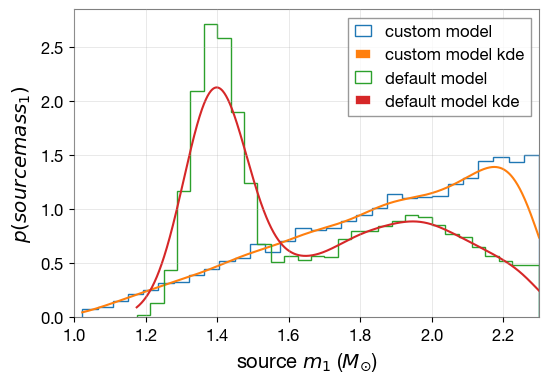

In [16]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# let's do a comparision plot between you custom model and the default model
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=custom_model_dict, # or the json file name
    plot_label='custom model',
);
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=default_model_dict,
    plot_label='default model',
);
plt.xlabel(r'source $m_1$ ($M_{\odot}$)')
plt.ylabel(r'$p(source mass_1)$')
plt.xlim(1,2.3)
plt.grid(alpha=0.4)
plt.show()

### Comparison of Axis-ratio model of the lensing galaxy. 

* compare the default axis-ratio distribution (gengamma, from SDSS galaxy catalogue, Collet et al. 2018) with custom axis-ratio distribution (Padilla and Strauss 2008)

In [22]:
ler.axis_ratio.info

{'name': 'axis_ratio_rayleigh',
 'velocity_dispersion': {'name': 'velocity_dispersion_ewoud',
  'z_min': 0.001,
  'z_max': 5,
  'cosmology': LambdaCDM(name=None, H0=<Quantity 70. km / (Mpc s)>, Om0=0.3, Ode0=0.7, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=None),
  'resolution': 500,
  'zl_resolution': 48,
  'sigma_min': 100.0,
  'sigma_max': 400.0,
  'alpha': 0.94,
  'beta': 1.85,
  'phistar': np.float64(0.02099),
  'sigmastar': 113.78},
 'resolution': 500,
 'sigma_resolution': 48,
 'q_min': 0.2,
 'q_max': 1.0}

In [20]:
size = 10000
padilla_strauss = ler.axis_ratio_padilla_strauss(size=size)

# ler 
# axis_ratio_rayleigh depends on the velocity dispersion
zl = np.ones(size)
sigma = ler.velocity_dispersion(size, zl)
rayleigh = ler.axis_ratio_rayleigh(size, sigma)

# custom
custom = ler.axis_ratio.rvs(size=size)

# make a dict
axis_ratio_dict = dict(
    rayleigh=rayleigh,
    custom=custom
)

axis_ratio_padilla_strauss interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_padilla_strauss_4.json
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_3.json


TypeError: not enough arguments: expected 2, got 1

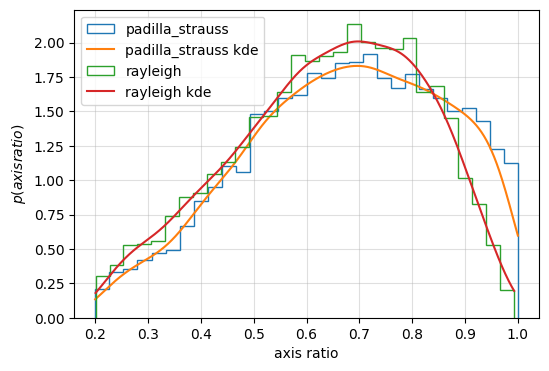

In [29]:
# plot the distribution of axis-ratio
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="padilla_strauss",
    param_dict=axis_ratio_dict,
    plot_label='padilla_strauss',
)
lerplt.param_plot(
    param_name="rayleigh",
    param_dict=axis_ratio_dict,
    plot_label='rayleigh',
)
plt.xlabel(r'axis ratio')
plt.ylabel(r'$p(axis ratio)$')
plt.grid(alpha=0.4)
plt.show()